## Datat Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Store data in CSV as a pandas object<br>
Display all the types of data that that the pandas object holds

In [2]:
df = pd.read_csv('Tweets.csv')
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

We only care about the rating (airline_sentiment) and the tweets itself (text)<br>
Display the first 10 as an example

In [22]:
df[['airline_sentiment', 'text']][:10]

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."


In [10]:
cross_tab = pd.crosstab(index=df['airline_sentiment'], columns='count')
cross_tab

col_0,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


Displays the volume of postive, negative, and neutral tweets<br>
This data set heavily favors negative tweets

<Container object of 3 artists>

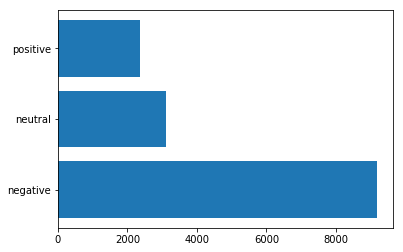

In [11]:
plt.barh(cross_tab.index, cross_tab['count'])

Displays the confidence of each rating compaired to confidence of the ratings<br>
purple = negative<br>
blue   = positive<br>
yellow = positive<br>

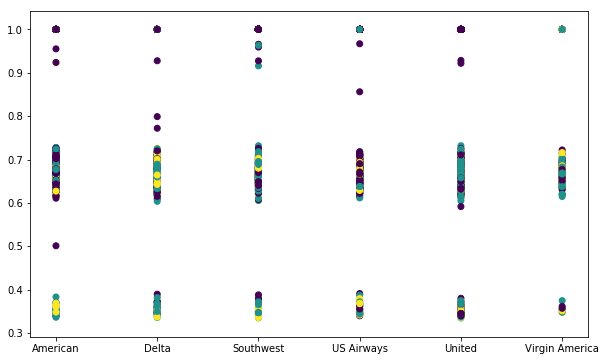

In [49]:
sentiments = []
average_confidence = np.zeros(3)
for sentiment, confidence in zip(df['airline_sentiment'], df['airline_sentiment_confidence']):
    if sentiment == 'positive':
        sentiments.append(1)
        average_confidence[0] += confidence
    elif sentiment == 'neutral':
        sentiments.append(0)
        average_confidence[1] += confidence
    elif sentiment == 'negative':
        sentiments.append(-1)
        average_confidence[2] += confidence
    else:
        print(False)
plt.figure(figsize=(10,6))
plt.scatter(df['airline'], df['airline_sentiment_confidence'], None, sentiments)

From the above plot we can see that negative reviews(purple) have a much higher confidence<br>
However, the mean of each confidence is relativly equivalent.


In [54]:
print('Positive      Neutral       Negative')
print('%.10f ' %(average_confidence[0]/2363.0),'%.10f ' %(average_confidence[1]/3099.0),
      '%.10f ' %(average_confidence[2]/9178.0))

Positive      Neutral       Negative
0.8720389336  0.8233033559  0.9333653192 
